In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style = "darkgrid")

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("diamonds.csv")

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.shape

(53940, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
#msno.matrix(df)

In [8]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [9]:
df.describe(include = ["O"])

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [10]:
df.loc[(df["x"] == 0 )|(df["y"] == 0 )|(df["z"] == 0 )]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [11]:
len(df.loc[(df["x"] == 0 )|(df["y"] == 0 )|(df["z"] == 0 )])

20

In [12]:
df = df[(df[["x","y","z"]] != 0).all(axis = 1)]
len(df)

53920

In [13]:
df.loc[(df["x"] == 0 )|(df["y"] == 0 )|(df["z"] == 0 )]

,carat,cut,color,clarity,depth,table,price,x,y,z


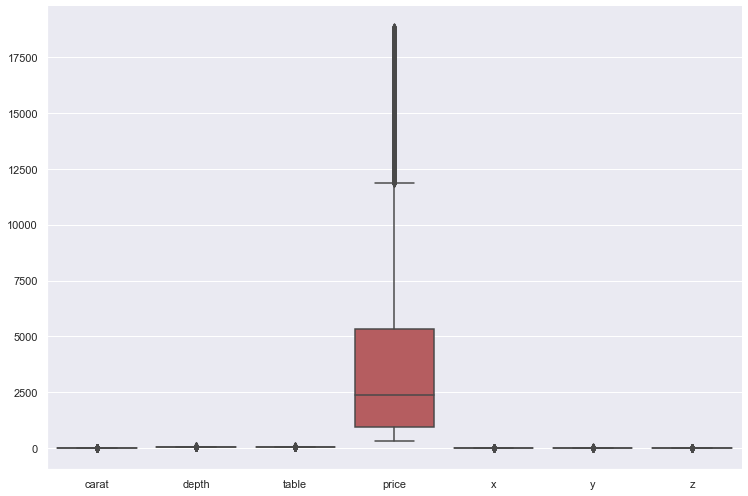

In [14]:
sns.factorplot(data = df, kind = "box" , size = 7, aspect = 1.5);

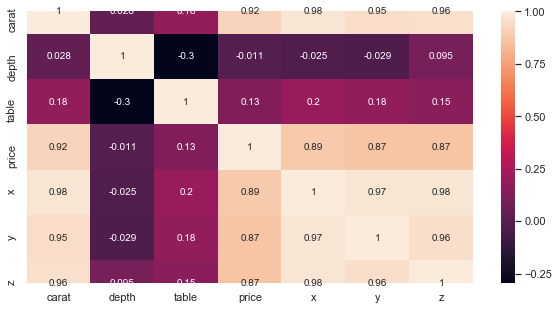

In [15]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True, )

plt.show()

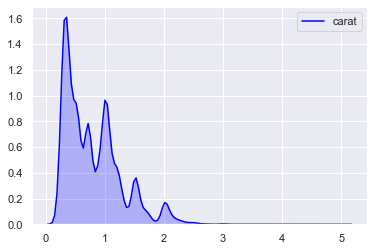

In [16]:
sns.kdeplot(df["carat"], shade = True, color = "blue");

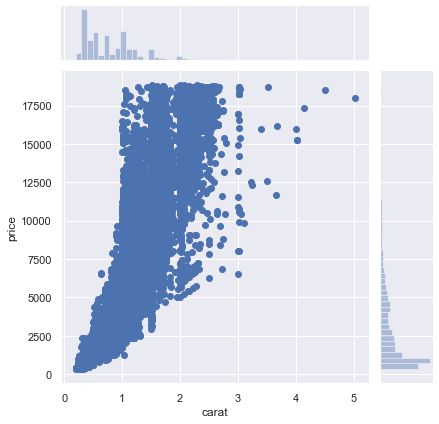

In [17]:
sns.jointplot(x = "carat", y = "price", data = df);

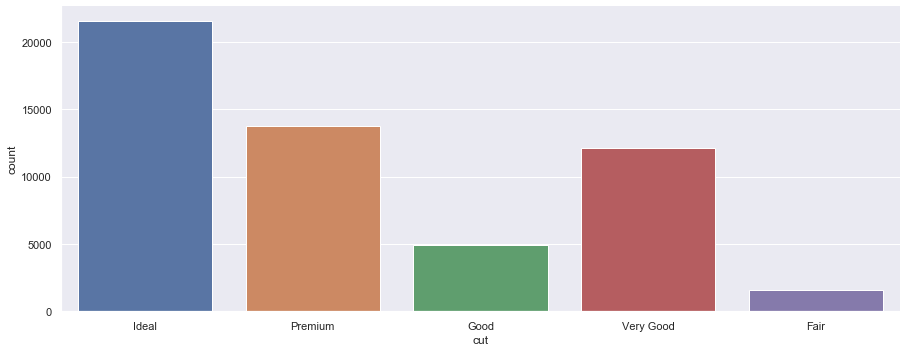

In [18]:
sns.factorplot( x = "cut", data = df, kind = "count", aspect = 2.5);

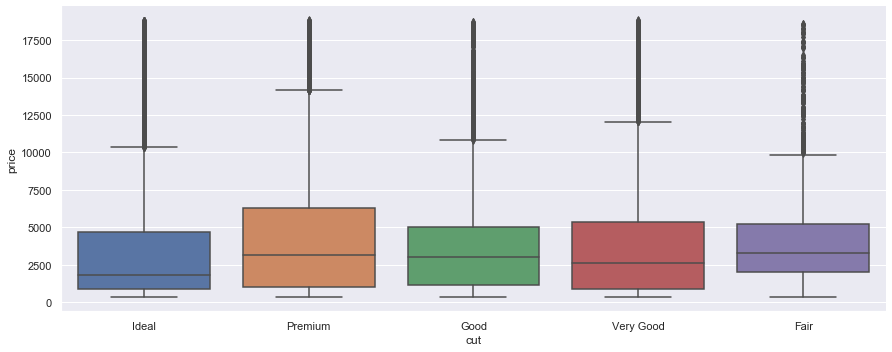

In [19]:
sns.factorplot(x = "cut", y = "price", data =df , kind = "box", aspect = 2.5);

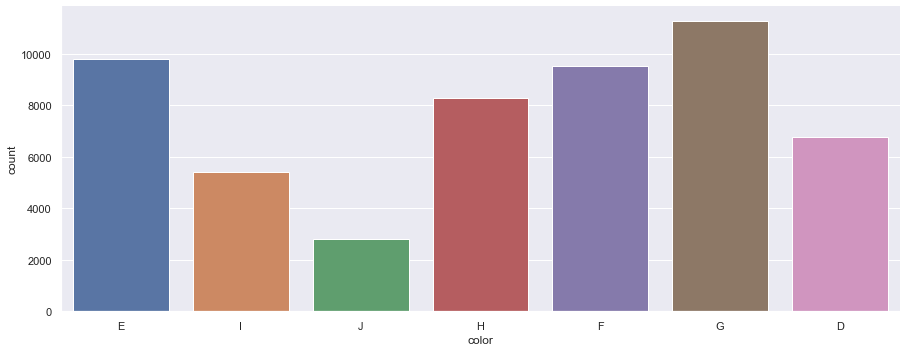

In [20]:
sns.factorplot(x = "color" , data = df, kind = "count" , aspect = 2.5);

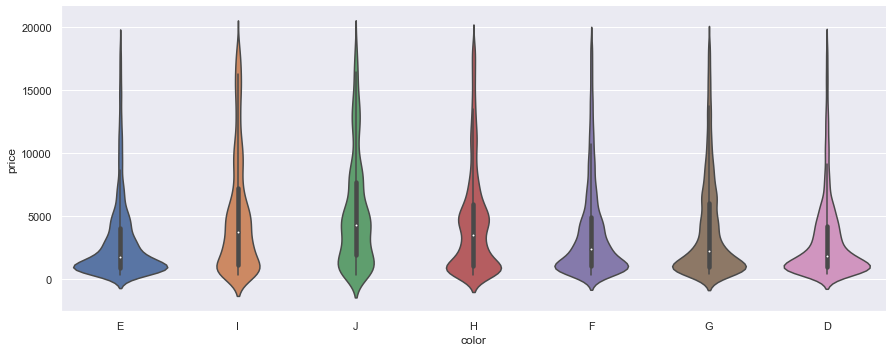

In [21]:
sns.factorplot(x = "color", y = "price", data = df, aspect = 2.5,kind =  "violin");

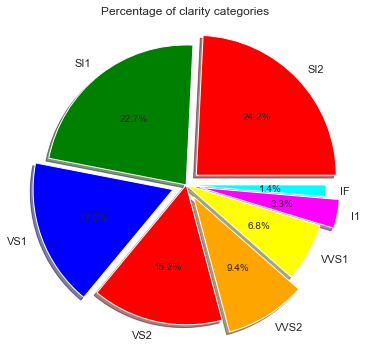

In [22]:
labels = df.clarity.unique().tolist()
sizes = df.clarity.value_counts().tolist()
colors = ["red", "green" , "blue" , "red", "orange", "yellow", "magenta" , "cyan"]
explode = (0.1,0.0,0.1,0,0.1,0,0.1,0)
plt.pie(sizes,explode = explode,labels = labels,colors = colors,autopct = "%1.1f%%", shadow = True, startangle = 0)
plt.axis("equal")
plt.title("Percentage of clarity categories")
plt.plot()
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

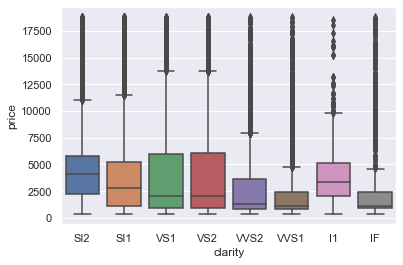

In [23]:
sns.boxplot(x = "clarity" , y = "price" , data = df);

(array([3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 4.0000e+00, 1.1000e+01, 4.3000e+01, 2.1900e+02,
        1.4240e+03, 5.0730e+03, 1.8242e+04, 2.2649e+04, 5.0330e+03,
        8.5100e+02, 2.3400e+02, 8.7000e+01, 2.7000e+01, 1.1000e+01,
        3.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([43.  , 44.44, 45.88, 47.32, 48.76, 50.2 , 51.64, 53.08, 54.52,
        55.96, 57.4 , 58.84, 60.28, 61.72, 63.16, 64.6 , 66.04, 67.48,
        68.92, 70.36, 71.8 , 73.24, 74.68, 76.12, 77.56, 79.  ]),
 <a list of 25 Patch objects>)

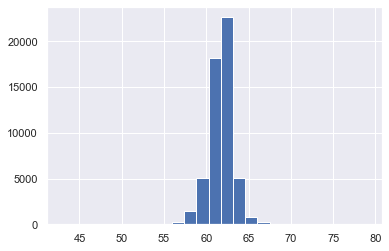

In [24]:
plt.hist("depth",data = df, bins = 25)

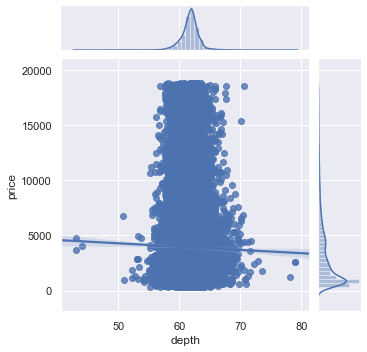

In [25]:
sns.jointplot(x = "depth" , y = "price" , data = df, kind = "regplot", size = 5);

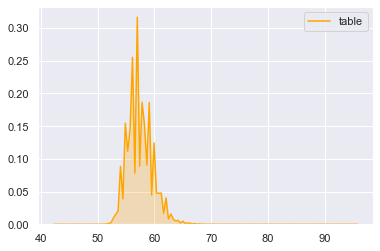

In [26]:
sns.kdeplot(df["table"], shade = True, color = "orange");

In [27]:
df["volume"] = df["x"] * df["y"] *df["x"];
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,62.097950
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,58.107264
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,66.758175
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,74.617200
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,81.934860


In [28]:
#plt.figure(figsize = (10,5))
#plt.hist(x = df)

In [29]:
####Drop X Y Z X

In [30]:
df.drop(["y","x","z"], axis = 1, inplace = True) 
df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,62.097950
1,0.21,Premium,E,SI1,59.8,61.0,326,58.107264
2,0.23,Good,E,VS1,56.9,65.0,327,66.758175
3,0.29,Premium,I,VS2,62.4,58.0,334,74.617200
4,0.31,Good,J,SI2,63.3,58.0,335,81.934860


In [32]:
from sklearn.preprocessing import LabelEncoder

In [36]:
Label_cut = LabelEncoder()
Labe_color = LabelEncoder()
Label_clarity = LabelEncoder()

df["cut"] = Label_cut.fit_transform(df["cut"])
df["color"] = Labe_color.fit_transform(df["color"])
df["clarity"] = Label_clarity.fit_transform(df["clarity"])